In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
# Load the dataset
df = pd.read_csv('appliance_energy.csv')

# Display the first few rows to understand the structure
print(df.head())

   Temperature (°C)  Energy Consumption (kWh)
0         22.490802                  2.292604
1         34.014286                  3.251925
2         29.639879                  3.009868
3         26.973170                  1.703533
4         18.120373                  1.702201


In [3]:
# Check for missing values
print(df.isnull().sum()) 
df = df.dropna()

Temperature (°C)            0
Energy Consumption (kWh)    0
dtype: int64


In [4]:
# Features (independent variable) and target (dependent variable)
# Independent variable (Temperature)
X = df[['Temperature (°C)']]  
# Dependent variable (Energy Consumption)
y = df['Energy Consumption (kWh)']  

In [5]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [6]:
# Create a Linear Regression model
model = LinearRegression()
# Train the model
model.fit(X_train, y_train)

LinearRegression()

In [7]:
# Make predictions on the test set
y_pred = model.predict(X_test)

In [8]:
y_pred

array([1.6858187 , 3.18154068, 2.96097494, 2.76354868, 2.0370856 ,
       2.36343345, 2.09711944, 3.12445907, 1.60849483, 2.24537556,
       2.34866555, 2.66462648, 3.0387357 , 3.27880886, 1.78664542,
       1.85218469, 2.95922164, 1.70468695, 3.0692904 , 1.87828475])

In [9]:

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Calculate R-Squared value
r2 = r2_score(y_test, y_pred)
print(f"R-Squared: {r2}")

Mean Squared Error: 0.16342487842925052
R-Squared: 0.6119478445218715


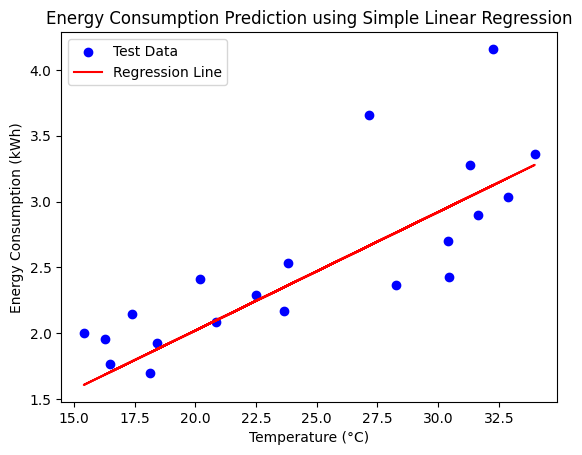

In [10]:

# Plot the test data and regression line
plt.scatter(X_test, y_test, color='blue', label='Test Data')  # Actual data
plt.plot(X_test, y_pred, color='red', label='Regression Line')  # Predicted data
plt.xlabel('Temperature (°C)')
plt.ylabel('Energy Consumption (kWh)')
plt.legend()
plt.title('Energy Consumption Prediction using Simple Linear Regression')
plt.show()

In [11]:
import joblib
# Save the model to a file
joblib.dump(model, 'appliance_energy_model.pkl')

['appliance_energy_model.pkl']

In [16]:
temp = input("Enter Temperature (°C): ")
temp = float(temp)
model = joblib.load('appliance_energy_model.pkl')
energy = model.predict([[temp]])
print(f"Predicted Energy Consumption (kWh): {energy[0]}")


Predicted Energy Consumption (kWh): 0.3119300994930906


C:\Users\user\AppData\Roaming\Python\Python312\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
